In [83]:
import pandas as pd
from gensim.utils import simple_preprocess
import string
import gensim
import demoji
import nltk
import pickle 
import pyLDAvis
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim_models

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vntao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Read the CSV file into a DataFrame with specified encoding
df = pd.read_csv('reviews.csv', encoding='utf-8')
df

,Business_name,Username,Review Date,Visit Date,Review Title,Review Text,Rating
0,Albeta Mediterranean Bakery,Traveler32528783809,"June 2, 2023",June 2023,Highly recommended,"Top quality products, exceptional customer ser...",5.0
1,Albeta Mediterranean Bakery,Tourist30751701237,"May 31, 2023",May 2023,Breakfast,A great place for breakfast! I really enjoyed ...,5.0
2,Albeta Mediterranean Bakery,Maria D,"May 10, 2023",May 2023,You have to try it,The stuff was very helpful and kind! They also...,5.0
3,Albeta Mediterranean Bakery,Stella K,"April 3, 2023",March 2023,Best bakery/quick bites,The best bakery in Thessaloniki. Highest quali...,5.0
4,Albeta Mediterranean Bakery,vagmarga,"March 3, 2023",March 2023,Delicious stuff for all day long!,"It has everything, from delicious food to poli...",5.0
...,...,...,...,...,...,...,...
1805,Iktinou Au Trottoir,drjosephgerges,"October 22, 2017",August 2017,a must for narrow street lover,"hiden in the streets of thessaloniki, this caf...",4.0
1806,Iktinou Au Trottoir,Orc_L,"August 29, 2016",August 2016,Slow service,Tables not cleaned after previous guests. Unat...,2.0
1807,Iktinou Au Trottoir,LGedik,"September 21, 2014",NaN,Lovely,Leisurely place for drinks... don't miss it. E...,5.0
1808,Iktinou Au Trottoir,"psaldanaf\nSanta Cruz, Bolivia","November 11, 2013",November 2013,Nice place to chill out,We found this cafe-bar by chance and were happ...,5.0


## Question 3

In [85]:
df['Review Date'] = pd.to_datetime(df['Review Date'])
# Extract only Year
df['Year'] = df['Review Date'].dt.year

In [86]:
ratings_count = df.groupby(['Business_name', 'Year'])['Rating'].count().reset_index()
avg_reviews = df.groupby(['Business_name', 'Year'])['Rating'].mean().reset_index()


ratings_count = ratings_count.rename(columns={'Rating': 'Ratings Count'})
avg_reviews = avg_reviews.rename(columns={'Rating': 'Average Rating'})

# Merge the dataframes based on 'Business_name' and 'Year'
combined_df = avg_reviews.merge(ratings_count, on=['Business_name', 'Year'])

# Print the combined dataframe
print(combined_df)

             Business_name  Year  Average Rating  Ratings Count
0    ARC Espresso Wine Bar  2015        4.200000             10
1    ARC Espresso Wine Bar  2016        4.863636             44
2    ARC Espresso Wine Bar  2017        4.250000             16
3    ARC Espresso Wine Bar  2018        4.250000             16
4    ARC Espresso Wine Bar  2019        4.923077             13
..                     ...   ...             ...            ...
442              ilios bar  2017        4.000000              1
443              ilios bar  2018        5.000000              1
444              ilios bar  2019        1.000000              1
445              ilios bar  2021        4.000000              1
446                   Ýdro  2022        5.000000              1

[447 rows x 4 columns]


In [87]:
# Sort the combined dataframe by 'Ratings Count' in descending order
combined_df_sorted = combined_df.sort_values(by='Ratings Count', ascending=False)
combined_df_sorted

,Business_name,Year,Average Rating,Ratings Count
201,Koukos,2018,4.812500,64
200,Koukos,2017,4.913043,46
1,ARC Espresso Wine Bar,2016,4.863636,44
352,Starbucks,2016,3.642857,28
202,Koukos,2019,4.962963,27
...,...,...,...,...
115,Coffee Hub,2018,4.000000,1
297,Paradosiako,2022,5.000000,1
298,Paradosiako - Mediterranean Cosmos,2015,4.000000,1
299,Paradosiako - Mediterranean Cosmos,2016,5.000000,1


In [88]:
# Keep only the rows with more that 10 reviews
filtered_df = combined_df_sorted[combined_df_sorted['Ratings Count'] > 10]
filtered_df

,Business_name,Year,Average Rating,Ratings Count
201,Koukos,2018,4.812500,64
200,Koukos,2017,4.913043,46
1,ARC Espresso Wine Bar,2016,4.863636,44
352,Starbucks,2016,3.642857,28
202,Koukos,2019,4.962963,27
415,To Tourlou,2019,4.692308,26
424,Valenio,2019,5.000000,26
182,JOIN Juice Bars,2017,4.833333,24
367,The Blue Cup,2017,4.454545,22
183,JOIN Juice Bars,2018,4.590909,22


In [89]:
pivot_df = filtered_df.pivot(index='Business_name', columns='Year', values='Average Rating')

# Get the column names for consecutive year ranges
column_names = []
for i in range(1, len(pivot_df.columns)):
    column_names.append(f"{pivot_df.columns[i-1]}-{pivot_df.columns[i]}")

# Create a new DataFrame for percentage difference
percentage_diff_df_filter = pd.DataFrame(columns=column_names)

# Calculate the percentage difference between consecutive years
for i in range(1, len(pivot_df.columns)):
    diff = (pivot_df.iloc[:, i] - pivot_df.iloc[:, i-1]) / pivot_df.iloc[:, i-1] * 100
    diff = diff.round(2).replace(np.nan, 0)  # Round to 2 decimal points and replace NaN values with 0
    #diff = diff.apply(lambda x: f"{x}%")  # Add percentage symbol
    percentage_diff_df_filter[column_names[i-1]] = diff


percentage_diff_df_filter

,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2022
Business_name,,,,,,
ARC Espresso Wine Bar,0.00,-12.62,0.00,15.84,0.0,0.0
Albeta Bakery,0.00,0.00,0.00,0.00,0.0,0.0
Albeta Mediterranean Bakery,0.00,0.00,0.00,0.00,0.0,0.0
Brusco Meze Bar,0.00,0.00,-2.15,2.80,0.0,0.0
Chilai Wine Restaurant Bar,0.00,-0.95,0.00,0.00,0.0,0.0
Coffee Island,0.00,0.00,1.37,0.00,0.0,0.0
JOIN Juice Bars,0.00,-1.36,-5.02,-1.98,0.0,0.0
Koukos,0.00,-1.74,-2.05,3.13,0.0,0.0
Macho Libre Cafe Bar,0.00,0.00,0.00,0.00,0.0,0.0


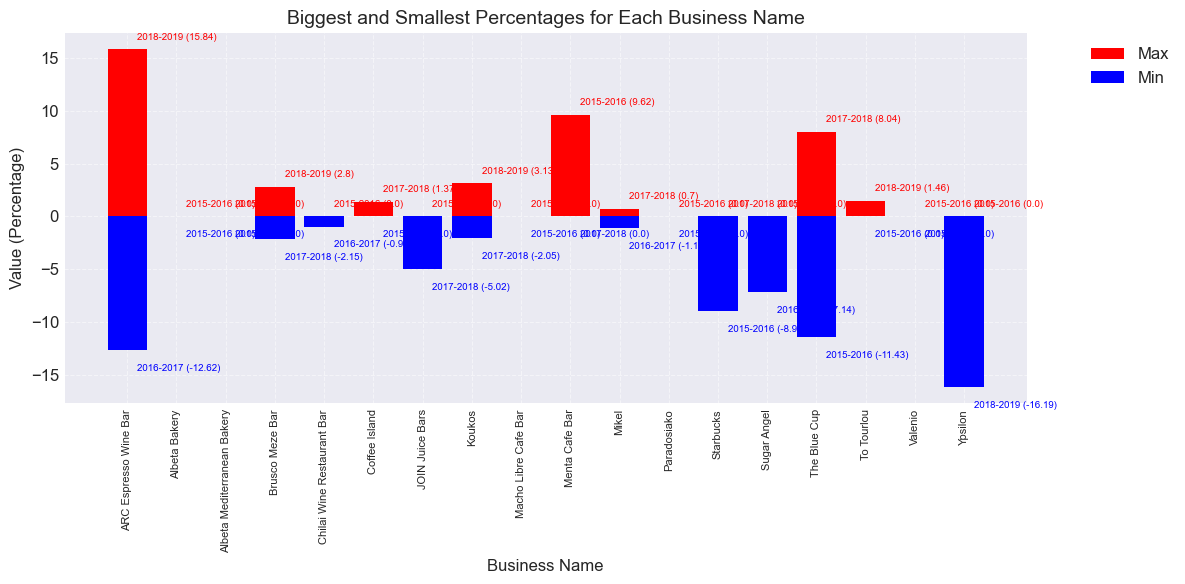

In [90]:
# Find the maximum and minimum values for each row
max_values = percentage_diff_df_filter.max(axis=1)
min_values = percentage_diff_df_filter.min(axis=1)

# Find the column names corresponding to the maximum and minimum values for each row
max_columns = percentage_diff_df_filter.idxmax(axis=1)
min_columns = percentage_diff_df_filter.idxmin(axis=1)

#Plot
fig, ax = plt.subplots(figsize=(12, 6))  
x_pos = np.arange(len(percentage_diff_df_filter))

ax.bar(
    x_pos,
    max_values,
    color='red',
    label='Max',
)
ax.bar(
    x_pos,
    min_values,
    color='blue',
    label='Min',
)


ax.set_xlabel('Business Name', fontsize=12)  
ax.set_ylabel('Value (Percentage)', fontsize=12)  
ax.set_title('Biggest and Smallest Percentages for Each Business Name', fontsize=14)  

# Add the column names near each bar
for i, shop in enumerate(percentage_diff_df_filter.index):
    ax.annotate(
        f"{max_columns[i]} ({max_values[i]})",
        xy=(x_pos[i], max_values[i]),
        xytext=(7, 7),
        textcoords='offset points',
        fontsize=7,
        color='red',
        ha='left',
    )
    ax.annotate(
        f"{min_columns[i]} ({min_values[i]})",
        xy=(x_pos[i], min_values[i]),
        xytext=(7, -15),
        textcoords='offset points',
        fontsize=7,
        color='blue',
        ha='left',
    )

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticks(x_pos)
ax.set_xticklabels(percentage_diff_df_filter.index, rotation=90, fontsize=8)
ax.grid(True, linestyle='--', alpha=0.5)  # Customize gridlines with a dashed line style and reduced opacity
plt.tight_layout()


plt.show()

In [91]:
oldest_year = combined_df.groupby('Business_name')['Year'].min()
latest_year = combined_df.groupby('Business_name')['Year'].max()

# Calculate the rating count difference between the latest year and the oldest year
difference = combined_df.groupby('Business_name')['Ratings Count'].last() - combined_df.groupby('Business_name')['Ratings Count'].first()


result_df = pd.DataFrame({'Business_name': oldest_year.index,
                          'Oldest Year': oldest_year.values,
                          'Latest Year': latest_year.values,
                          'Difference': difference.values})


result_df['Year Range'] = result_df['Oldest Year'].astype(str) + ' - ' + result_df['Latest Year'].astype(str)
result_df

,Business_name,Oldest Year,Latest Year,Difference,Year Range
0,ARC Espresso Wine Bar,2015,2023,-9,2015 - 2023
1,Ahilleion,2012,2017,-1,2012 - 2017
2,Aithrio,2019,2019,0,2019 - 2019
3,Albeta Bakery,2019,2023,-11,2019 - 2023
4,Albeta Mediterranean Bakery,2016,2023,6,2016 - 2023
...,...,...,...,...,...
130,Yellow Premium Coffee,2022,2022,0,2022 - 2022
131,Yfilios Bar Nationale,2017,2020,0,2017 - 2020
132,Ypsilon,2017,2023,-7,2017 - 2023
133,ilios bar,2017,2021,0,2017 - 2021


C:\Users\vntao\AppData\Local\Temp\ipykernel_1796\2667253558.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


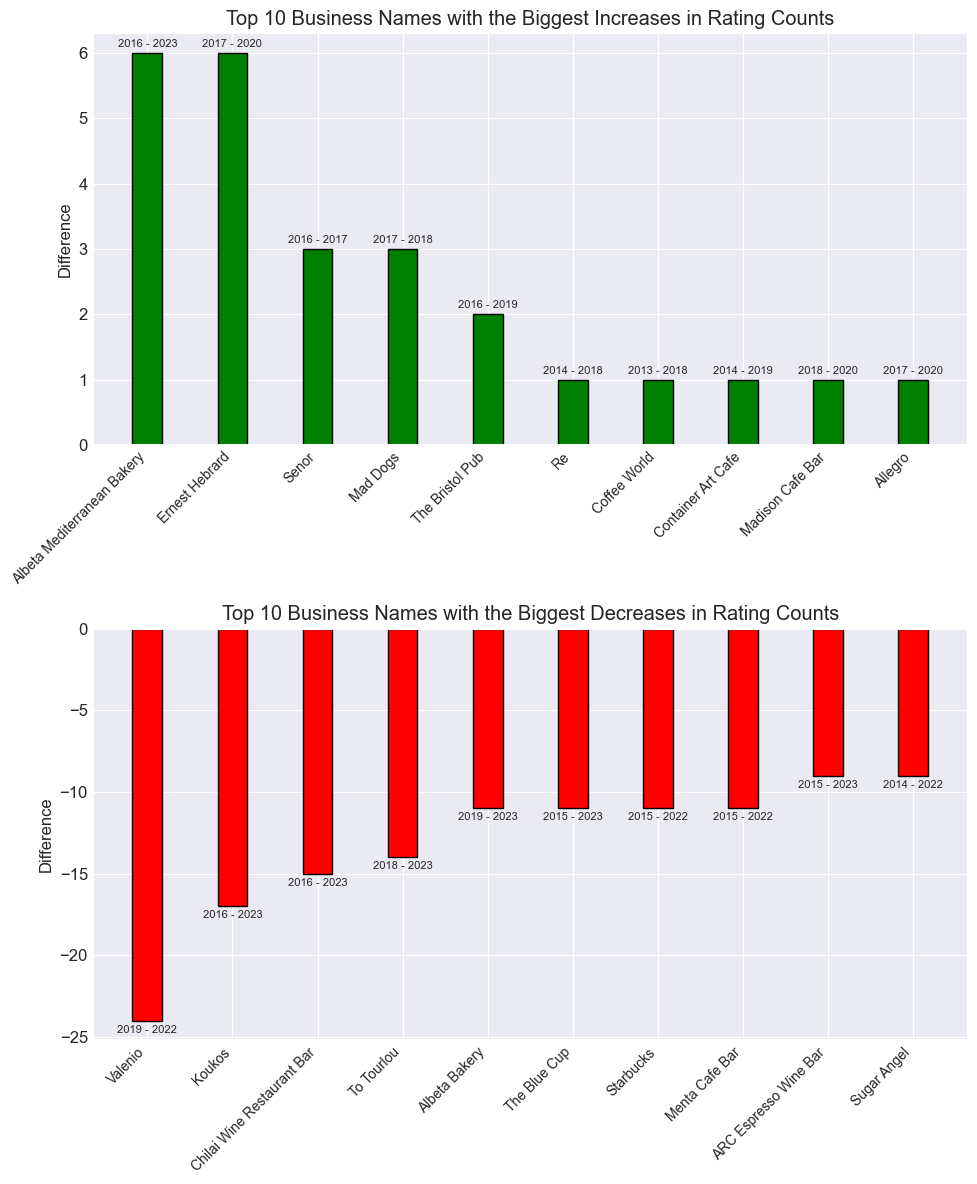

In [92]:
# Sort the DataFrame by 'Difference' column
sorted_df = result_df.sort_values('Difference')

# Get the top 10 increases and decreases
top_increases = sorted_df.nlargest(10, 'Difference').reset_index(drop=True)
top_decreases = sorted_df.nsmallest(10, 'Difference').reset_index(drop=True)


business_names_increases = top_increases['Business_name']
business_names_decreases = top_decreases['Business_name']
year_ranges_increases = top_increases['Year Range']
year_ranges_decreases = top_decreases['Year Range']
differences_increases = top_increases['Difference']
differences_decreases = top_decreases['Difference']

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
bar_width = 0.35

x_pos_increases = np.arange(len(business_names_increases))
x_pos_decreases = np.arange(len(business_names_decreases))

ax1.bar(x_pos_increases, differences_increases, bar_width, color='green', edgecolor='black')
ax1.set_xticks(x_pos_increases)
ax1.set_xticklabels(business_names_increases, rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Difference')
ax1.set_title('Top 10 Business Names with the Biggest Increases in Rating Counts')

for i, xpos in enumerate(x_pos_increases):
    ax1.annotate(year_ranges_increases[i], xy=(xpos, differences_increases[i]), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=8)


ax2.bar(x_pos_decreases, differences_decreases, bar_width, color='red', edgecolor='black')
ax2.set_xticks(x_pos_decreases)
ax2.set_xticklabels(business_names_decreases, rotation=45, ha='right', fontsize=10)
ax2.set_ylabel('Difference')
ax2.set_title('Top 10 Business Names with the Biggest Decreases in Rating Counts')

for i, xpos in enumerate(x_pos_decreases):
    ax2.annotate(year_ranges_decreases[i], xy=(xpos, differences_decreases[i]), xytext=(0, -10),
                 textcoords="offset points", ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=12)
plt.rcParams['axes.linewidth'] = 1.5


plt.show()

## Question 6

### Useful funtions

In [93]:
def remove_emoji(string):
    return demoji.replace(string, '')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [94]:
df_6 = df.drop(columns=['Business_name', 'Username', 'Visit Date', 'Review Title', 'Rating'], axis=1)
df_6.head()

,Review Date,Review Text,Year
0,2023-06-02,"Top quality products, exceptional customer ser...",2023
1,2023-05-31,A great place for breakfast! I really enjoyed ...,2023
2,2023-05-10,The stuff was very helpful and kind! They also...,2023
3,2023-04-03,The best bakery in Thessaloniki. Highest quali...,2023
4,2023-03-03,"It has everything, from delicious food to poli...",2023


In [95]:
## Remove punctuation and emojis and convert to lowercase 
df_6['text_processed'] = \
df_6['Review Text'].map(lambda x: remove_emoji(x.translate(str.maketrans('', '', string.punctuation)).lower()))

print(df_6['text_processed'])

0       top quality products exceptional customer serv...
1       a great place for breakfast i really enjoyed t...
2       the stuff was very helpful and kind they also ...
3       the best bakery in thessaloniki highest qualit...
4       it has everything from delicious food to polit...
                              ...                        
1805    hiden in the streets of thessaloniki this cafe...
1806    tables not cleaned after previous guests unatt...
1807    leisurely place for drinks dont miss it excell...
1808    we found this cafebar by chance and were happy...
1809    best place to have a good cup of coffee downto...
Name: text_processed, Length: 1810, dtype: object


In [96]:
stop_words_english = stopwords.words('english')
stop_words_greek = stopwords.words('greek')

stop_words = stop_words_english + stop_words_greek
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [97]:
def remove_stopwords(texts):
    # these methods are deleting different kinds of stop words and we need them all out
    texts = [[gensim.parsing.preprocessing.remove_stopwords(str(text))] for text in texts]
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [98]:
data = df_6.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['top', 'quality', 'products', 'exceptional', 'customer', 'service', 'tasty', 'food', 'coffee', 'also', 'good', 'one', 'favorite', 'choices']


In [99]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [100]:
## LDA model training----------------------------------------------------------------------------------------------

# number of topics
num_topics = 10
LDAvis_data_filepath = './plots/basic_visualizations/ldavis_prepared_' + str(num_topics)

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(LDAvis_data_filepath), exist_ok=True)
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


## Analyzing LDA model results--------------------------------------------------------------------------------------
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./plots/basic_visualizations/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')
LDAvis_prepared

[(0,
  '0.014*"great" + 0.011*"coffee" + 0.010*"place" + 0.010*"nice" + '
  '0.009*"thessaloniki" + 0.008*"one" + 0.008*"πολυ" + 0.007*"friendly" + '
  '0.007*"best" + 0.007*"atmosphere"'),
 (1,
  '0.020*"nice" + 0.016*"coffee" + 0.016*"place" + 0.011*"bar" + 0.010*"good" '
  '+ 0.008*"friendly" + 0.007*"really" + 0.006*"delicious" + '
  '0.006*"thessaloniki" + 0.006*"food"'),
 (2,
  '0.028*"place" + 0.016*"coffee" + 0.012*"nice" + 0.011*"great" + '
  '0.009*"best" + 0.008*"staff" + 0.008*"service" + 0.008*"friendly" + '
  '0.007*"good" + 0.006*"like"'),
 (3,
  '0.021*"coffee" + 0.021*"good" + 0.013*"place" + 0.012*"service" + '
  '0.010*"great" + 0.009*"food" + 0.009*"nice" + 0.007*"staff" + 0.007*"also" '
  '+ 0.007*"drinks"'),
 (4,
  '0.021*"place" + 0.016*"coffee" + 0.016*"great" + 0.011*"good" + '
  '0.009*"best" + 0.008*"thessaloniki" + 0.008*"really" + 0.008*"service" + '
  '0.007*"nice" + 0.007*"staff"'),
 (5,
  '0.022*"place" + 0.014*"coffee" + 0.010*"great" + 0.009*"staff" + 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.019807 -0.012892       1        1  15.900243
2      0.041255 -0.020669       2        1  13.352974
3     -0.003514 -0.020010       3        1  12.658242
7     -0.005989 -0.031445       4        1   9.796101
9      0.039688  0.007903       5        1   9.546631
1      0.025763 -0.014811       6        1   9.009742
6     -0.065119 -0.014686       7        1   8.699657
0     -0.074038  0.060043       8        1   7.836388
4      0.010219 -0.036190       9        1   7.239160
5      0.051543  0.082756      10        1   5.960861, topic_info=         Term        Freq       Total Category  logprob  loglift
2545     πολυ  123.000000  123.000000  Default  30.0000  30.0000
20      place  671.000000  671.000000  Default  29.0000  29.0000
7        good  547.000000  547.000000  Default  28.0000  28.0000
58       nice  450.000000  450.000000  Default  27.0000  27.0000
2      coffee  764.000000  764.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
275    prices    9.184028  152.494301  Topic10  -5.6029   0.0103
8         one   10.093134  225.155431  Topic10  -5.5085  -0.2850
761     music    9.725677  214.951497  Topic10  -5.5456  -0.2757
0        also    9.368801  192.690674  Topic10  -5.5830  -0.2037
80    amazing    8.112293  125.903829  Topic10  -5.7270   0.0778

[795 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3905      7  0.795934    abroad
4062      5  0.720446    action
569       3  0.676078       add
569       5  0.225359       add
1003      6  0.782312  againbtw
...     ...       ...       ...
2560      6  0.108347     ωραιο
2560      7  0.162520     ωραιο
2560      8  0.270867     ωραιο
2560      9  0.108347     ωραιο
5206      8  0.802503      ωρες

[1971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 4, 8, 10, 2, 7, 1, 5, 6])